In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv("World_Happiness_Report.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
#df.tail()

In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.columns.size

12

In [6]:
df.index

RangeIndex(start=0, stop=158, step=1)

In [7]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [8]:
df.info()
#There is no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

### Summary Statistics

In [10]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### Data Visualization-(Outliers)

<AxesSubplot:>

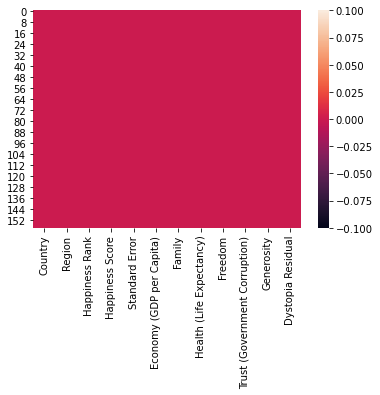

In [11]:
sns.heatmap(df.isnull()) #Dataset has no missing values.

Happiness Rank                      AxesSubplot(0.125,0.657941;0.168478x0.222059)
Happiness Score                  AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Standard Error                   AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Economy (GDP per Capita)         AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Family                              AxesSubplot(0.125,0.391471;0.168478x0.222059)
Health (Life Expectancy)         AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Freedom                          AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Trust (Government Corruption)    AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Generosity                             AxesSubplot(0.125,0.125;0.168478x0.222059)
Dystopia Residual                   AxesSubplot(0.327174,0.125;0.168478x0.222059)
dtype: object

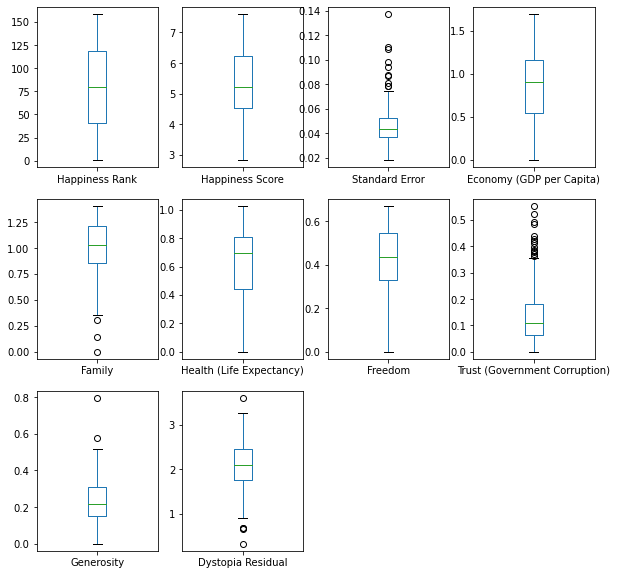

In [12]:
df.plot(kind="box",subplots=True,layout=(3,4),figsize=(10,10))
# Extram Outliers present in Standard Error,Trust(Government Corruption),family

<AxesSubplot:>

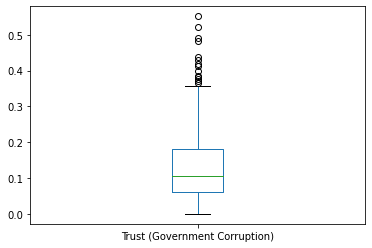

In [13]:
df['Trust (Government Corruption)'].plot.box()

<AxesSubplot:>

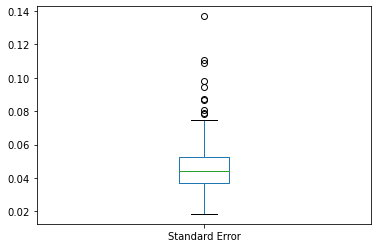

In [14]:
df['Standard Error'].plot.box()

<AxesSubplot:>

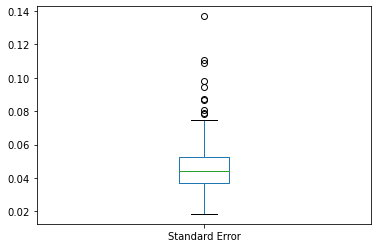

In [15]:
df['Standard Error'].plot.box()

<AxesSubplot:>

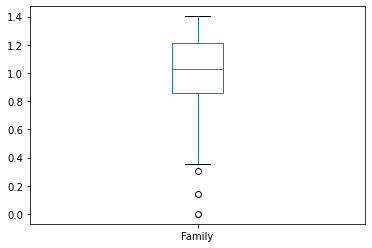

In [16]:
df['Family'].plot.box()

### To Check Correlation

In [17]:
dfcor=df.corr()
dfcor

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


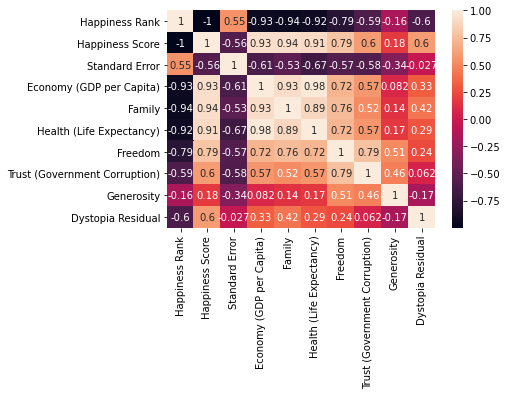

In [18]:
corr_hmap=dfcor.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_hmap,annot=True)
plt.show()

### Ploting Outliers

In [19]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [20]:
df1=pd.DataFrame(df.iloc[:,2:12])
df1.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [21]:
#Removing Outliers 
import scipy
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[1.72099989, 1.93736005, 0.80592569, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.69907456, 1.91458063, 0.05588945, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.67714922, 1.88479215, 0.8544869 , ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [1.67742676, 2.0761992 , 0.13253425, ..., 0.38141902, 1.85689094,
        3.20843049],
       [1.69935209, 2.1646885 , 2.26396166, ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.72127743, 2.22251319, 1.13418227, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [22]:
df1.skew() 
#Remove skewness

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [23]:
from scipy.stats import boxcox
df1['Happiness Rank']=boxcox(df1['Happiness Rank'],0)

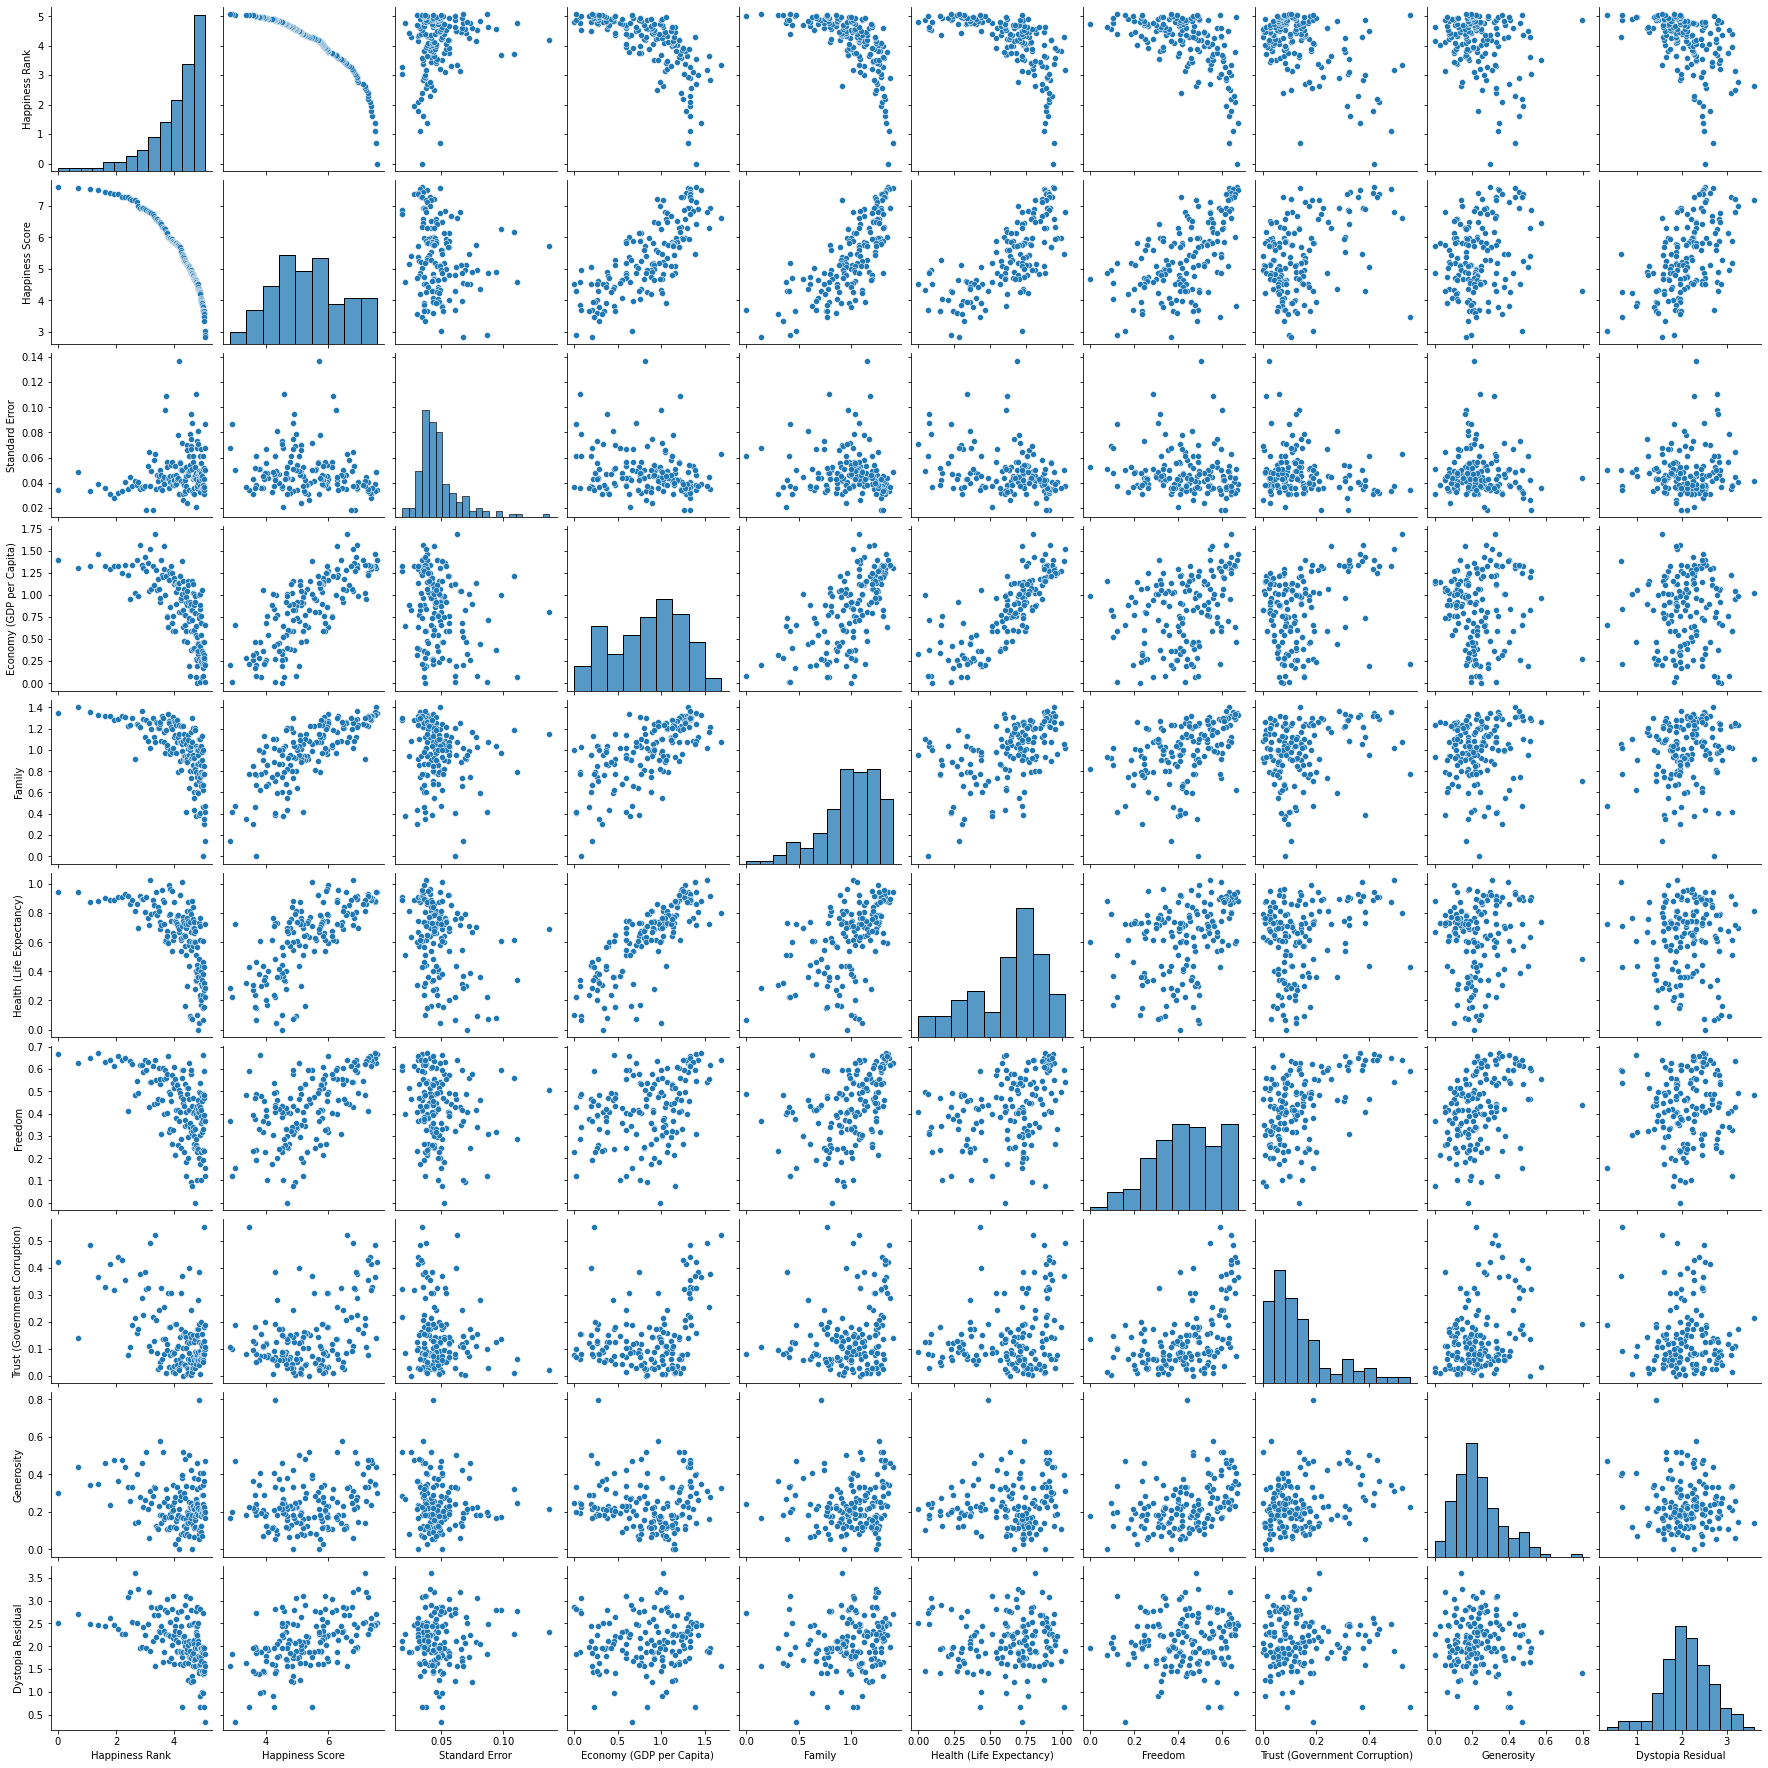

In [24]:
sns.pairplot(df1)

In [25]:
new_df1=df1[(z<3).all(axis=1)]

In [26]:
df.shape

(158, 12)

In [27]:
new_df1.shape

(149, 10)

In [28]:
new_df1.columns

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [29]:
x=new_df1.iloc[:,0:-1]
x.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,0.000000,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,0.693147,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.098612,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.386294,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.609438,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [30]:
x.shape

(149, 9)

In [31]:
y=new_df1.iloc[:,-1]
y.shape

(149,)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [33]:
x_train.shape

(99, 9)

In [34]:
y_train.shape

(99,)

In [35]:
x_test.shape

(50, 9)

In [36]:
y_test.shape

(50,)

In [37]:
lm=LinearRegression()

In [38]:
lm.fit(x_train,y_train)

LinearRegression()

In [39]:
lm.coef_

array([ 8.10538347e-05,  1.00009514e+00,  3.55317019e-04, -1.00019562e+00,
       -9.99937420e-01, -9.99791270e-01, -9.99667450e-01, -1.00000184e+00,
       -9.99930715e-01])

In [40]:
lm.intercept_

-0.0010309556257936947

In [41]:
lm.score(x_train,y_train)

0.999999704441967

In [42]:
#predict tha value
pred=lm.predict(x_test)
print("predicted result price :",pred)
print("actual price",y_test)

predicted result price : [2.23241806 2.41455163 2.44848466 1.87965376 2.00074239 2.85768918
 2.4324652  1.38092047 0.65448592 1.93109901 1.71919058 2.53345093
 2.32312393 2.2665248  2.2471228  2.13139899 1.44412209 1.58823561
 2.59443423 1.94924182 2.67780383 1.46159836 2.67626403 1.95066649
 0.89933567 1.41703014 2.30870686 1.84415951 2.53924513 2.32137684
 3.19116537 3.26050621 2.76620945 3.17768206 2.24632586 2.51769184
 2.24709884 2.21125745 2.45189272 2.3199008  1.78526158 1.62254758
 1.75333715 1.9694277  3.08892543 2.63444544 1.79306717 1.94262996
 1.63815255 1.95296143]
actual price 76     2.23270
18     2.41484
121    2.44876
81     1.87996
79     2.00073
32     2.85737
67     2.43209
145    1.38079
71     0.65429
85     1.93129
112    1.71956
12     2.53320
37     2.32323
9      2.26646
19     2.24743
58     2.13090
141    1.44395
72     1.58782
57     2.59450
136    1.94939
30     2.67782
127    1.46181
26     2.67585
132    1.95071
133    0.89991
150    1.41723
113    2.309

In [43]:
print('error:')
print("mean absolute error:",mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 0.00024142467632529474
mean squared error: 8.036143491962689e-08
root mean squared error: 0.0002834809251424633


In [44]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9999997292307303


In [45]:
t=np.array([198,3.2356,0.2356,0.61246,0.0125,0.45135,0.5633,0.56125,0.4223])

In [46]:
t.shape

(9,)

In [47]:
t=t.reshape(1,-1)
t

array([[1.9800e+02, 3.2356e+00, 2.3560e-01, 6.1246e-01, 1.2500e-02,
        4.5135e-01, 5.6330e-01, 5.6125e-01, 4.2230e-01]])

In [48]:
lm.predict(t)

array([0.62803999])

In [49]:
#saving model
import pickle

In [50]:
Word_Happiness_Report='picklelmfile.pkl'